In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
df_games = pd.read_csv(("C:\\Users\\Geksmode\\Desktop\\data\\IGN_games_from_best_to_worst.csv"))

In [3]:
df_games.sample(n=5)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
18223,Dual Heroes,2.8,Painful,Nintendo 64,Fighting,1998,11,9
16535,Tetris Worlds,4.6,Bad,Xbox,Puzzle,2002,6,26
16989,Sprint Car Racing,4.2,Bad,PC,Racing,2000,10,11
9339,Puzzler Collection,7.3,Good,Nintendo DS,"Puzzle, Compilation",2008,8,20
18373,Family Fest Presents Circus Games -- 20 Big To...,2.2,Painful,Wii,Party,2008,12,12


In [4]:
df_games.describe()

,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.00000,18625.000000
mean,6.950459,2006.515329,7.13847,15.603866
std,1.711736,4.587529,3.47671,8.690128
min,0.500000,1970.000000,1.00000,1.000000
25%,6.000000,2003.000000,4.00000,8.000000
50%,7.300000,2007.000000,8.00000,16.000000
75%,8.200000,2010.000000,10.00000,23.000000
max,10.000000,2016.000000,12.00000,31.000000


Text(0, 0.5, 'Number Of Games')

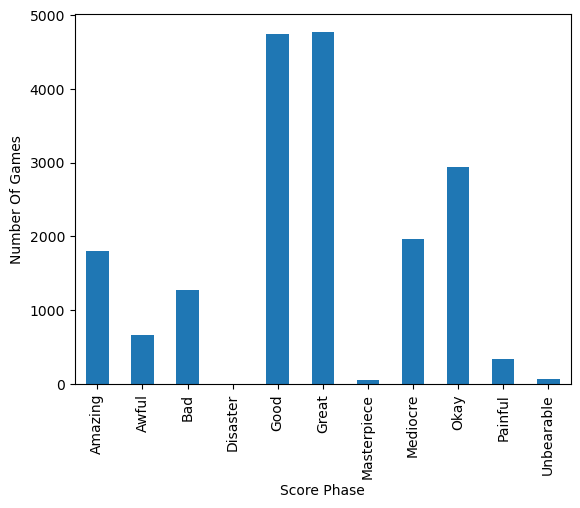

In [5]:
df_games.groupby(by = 'score_phrase').title.count().plot(kind = 'bar')
plt.xlabel('Score Phase')
plt.ylabel('Number Of Games')

Text(0, 0.5, 'Number Of Games')

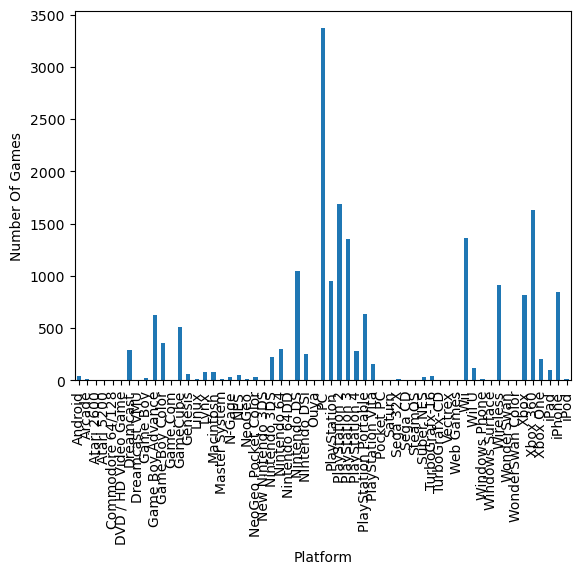

In [6]:
df_games.groupby(by = 'platform').title.count().plot(kind = 'bar')
plt.xlabel('Platform')
plt.ylabel('Number Of Games')

In [7]:
df_games["platform"].unique()

array(['Lynx', 'Wii', 'Game Boy Color', 'Xbox 360', 'PlayStation 3',
       'PlayStation 4', 'Xbox One', 'PC', 'iPhone', 'Game Boy',
       'NeoGeo Pocket Color', 'Dreamcast', 'Nintendo 64', 'Wireless',
       'Macintosh', 'Game Boy Advance', 'PlayStation 2', 'Xbox',
       'PlayStation', 'GameCube', 'Wii U', 'Nintendo 3DS', 'iPad',
       'Nintendo DS', 'PlayStation Portable', 'PlayStation Vita', 'Linux',
       'NES', 'Arcade', 'Android', 'Master System', 'Nintendo DSi',
       'Genesis', 'Super NES', 'Saturn', 'iPod', 'SteamOS', 'N-Gage',
       'New Nintendo 3DS', 'WonderSwan Color', 'TurboGrafx-16',
       'Windows Phone', 'Pocket PC', 'TurboGrafx-CD', 'NeoGeo',
       'Nintendo 64DD', 'Atari 5200', 'WonderSwan', 'Web Games',
       'Sega 32X', 'Ouya', 'Atari 2600', 'Vectrex', 'Commodore 64/128',
       'Game.Com', 'Sega CD', 'Windows Surface', 'Dreamcast VMU',
       'DVD / HD Video Game'], dtype=object)

In [8]:
df_games

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25
...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,Action,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,Action,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,Racing,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,Action,1998,10,29


In [9]:
Nintendo = ["Wii",'Game Boy Color','Game Boy','Nintendo 64','Game Boy Advance','GameCube','Wii U','Nintendo 3DS','Nintendo DS','Nintendo DSi','Super NES','New Nintendo 3DS','Nintendo 64DD']
Sony = ['PlayStation 3', 'PlayStation 4','PlayStation 2','PlayStation','PlayStation Portable','PlayStation Vita']
Microsoft = ['Xbox 360','Xbox One','Xbox']
Sega = ['Dreamcast','Master System','Genesis','Saturn','Dreamcast VMU','Sega CD']

In [10]:
df_games.insert(4,"company",pd.NA)

In [11]:
df_games

,title,score,score_phrase,platform,company,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,NaN,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,NaN,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,NaN,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,NaN,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,NaN,"Action, Adventure",2008,4,25
...,...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,NaN,Action,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,NaN,Action,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,NaN,Racing,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,NaN,Action,1998,10,29


In [12]:
df_games['company'] = df_games['company'].fillna('Other')

for i in Nintendo:
    df_games.loc[df_games['platform'] == i,"company"] = "Nintendo"
for i in Sony :
    df_games.loc[df_games['platform'] == i,"company"] = "Sony"
for i in Microsoft :
    df_games.loc[df_games['platform'] == i,"company"] = "Microsoft"
for i in Sega :
    df_games.loc[df_games['platform'] == i,"company"] = "Sega"
    

In [13]:
df_games

,title,score,score_phrase,platform,company,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Other,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,Nintendo,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,Nintendo,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,Microsoft,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,Sony,"Action, Adventure",2008,4,25
...,...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,Sony,Action,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,Sony,Action,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,Nintendo,Racing,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,Other,Action,1998,10,29


In [14]:
nintendo_games = df_games[df_games['company']=='Nintendo']
sony_games = df_games[df_games['company']=='Sony']
microsoft_games = df_games[df_games['company']=='Microsoft']

Text(0, 0.5, 'Number Of Games')

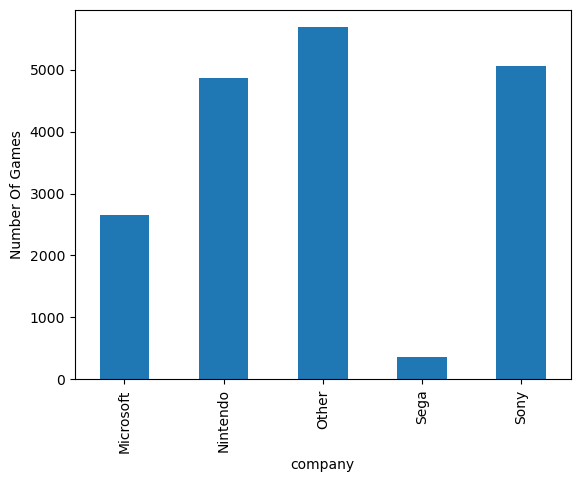

In [15]:
df_games.groupby(by = 'company').title.count().plot(kind = 'bar')
plt.xlabel('company')
plt.ylabel('Number Of Games')

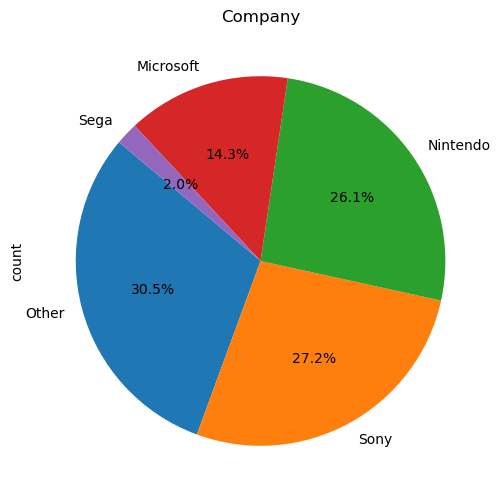

In [16]:
plt.figure(figsize=(10, 6))
df_games['company'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Company')
plt.show()

C:\Users\Geksmode\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

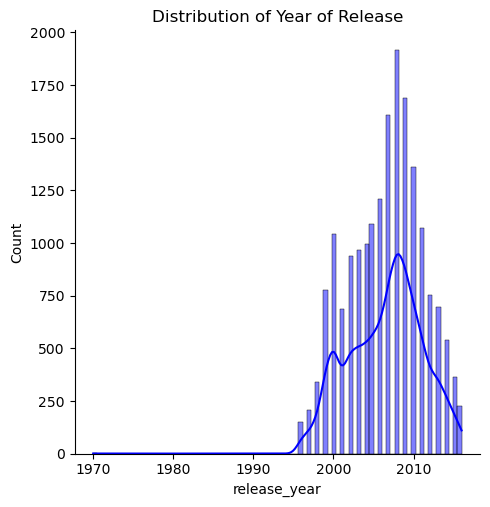

In [17]:
plt.figure(figsize=(10, 6))
sns.displot(df_games['release_year'], kde=True, color='blue')
plt.title('Distribution of Year of Release')
plt.show()

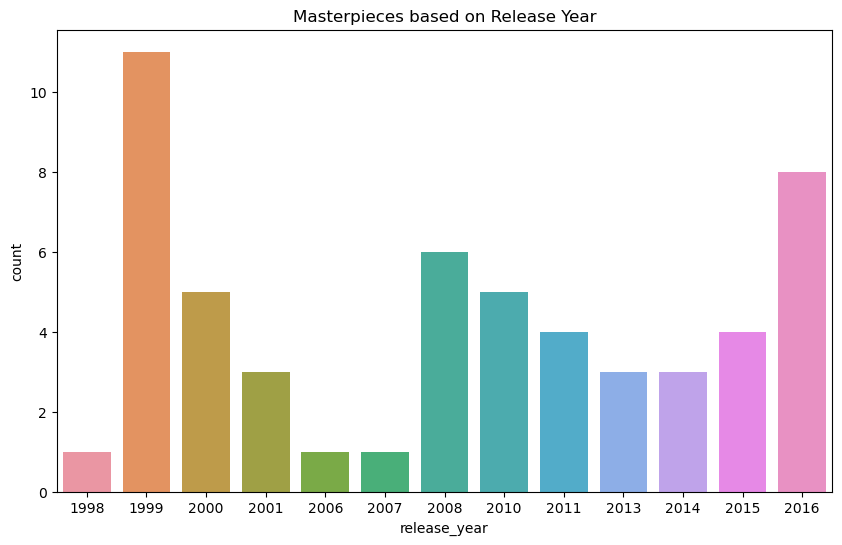

In [18]:
masterpieces = df_games[df_games['score'] == 10]
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=masterpieces)
plt.title('Masterpieces based on Release Year')
plt.show()

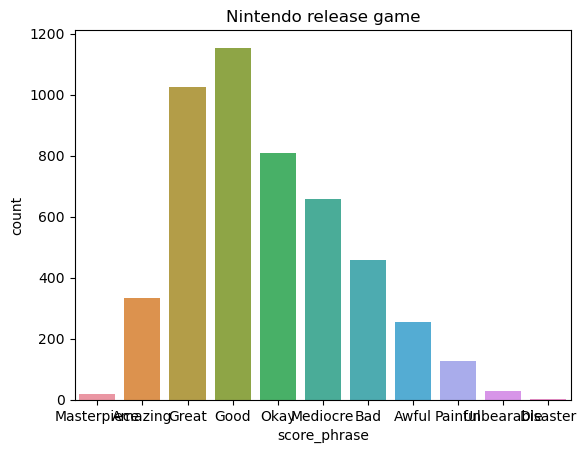

In [37]:
plt.Figure(figsize=(10,10))
sns.countplot(x='score_phrase', data=nintendo_games)
plt.title('Nintendo release game')
plt.show()

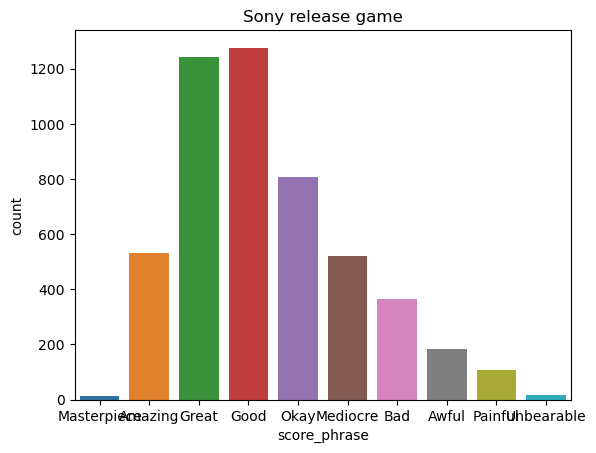

In [21]:
plt.Figure(figsize=(10,10))
sns.countplot(x='score_phrase', data=sony_games)
plt.title('Sony release game')
plt.show()

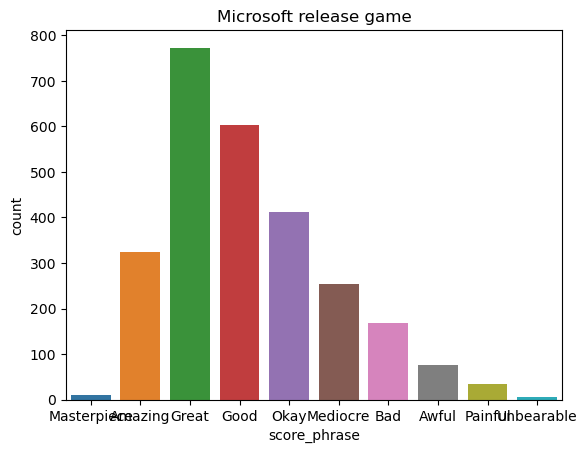

In [22]:
plt.Figure(figsize=(10,10))
sns.countplot(x='score_phrase', data=microsoft_games)
plt.title('Microsoft release game')
plt.show()

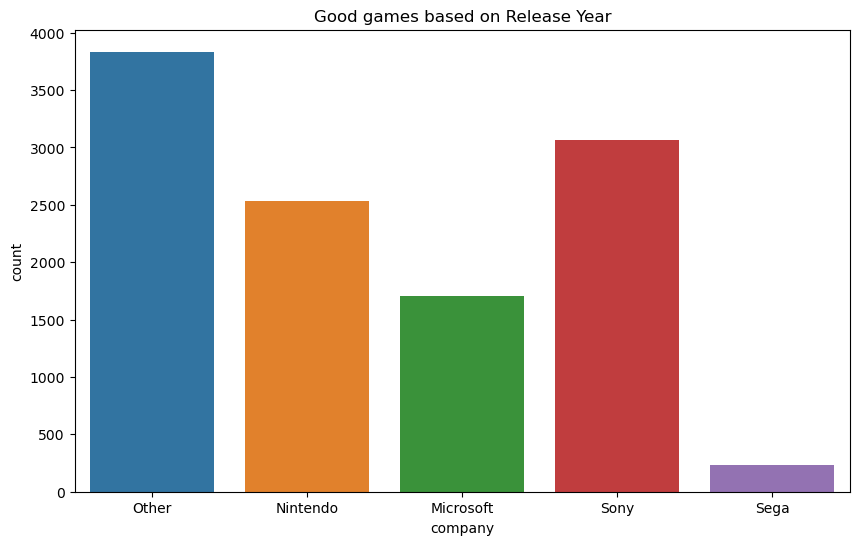

In [23]:
good_games = df_games[df_games['score'] >= 7]
plt.figure(figsize=(10, 6))
sns.countplot(x='company', data=good_games)
plt.title('Good games based on Release Year')
plt.show()

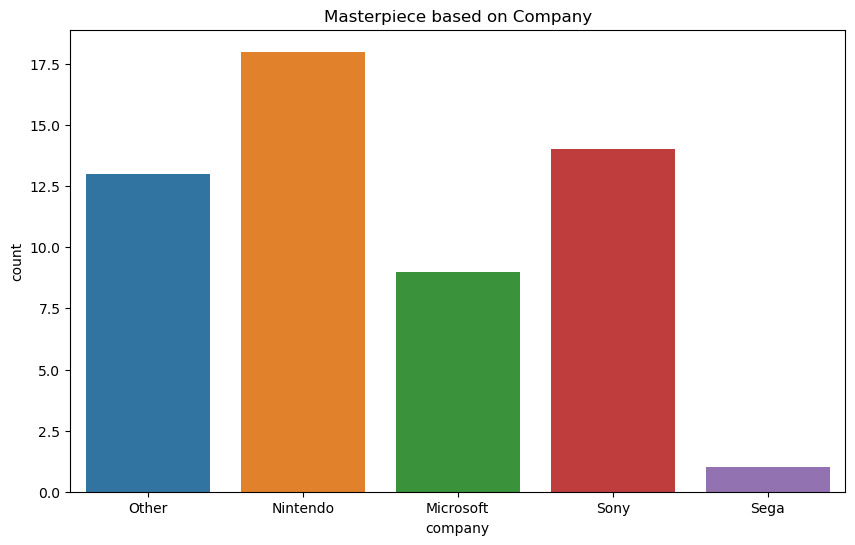

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='company', data=masterpieces)
plt.title('Masterpiece based on Company')
plt.show()

<Axes: xlabel='score', ylabel='count'>

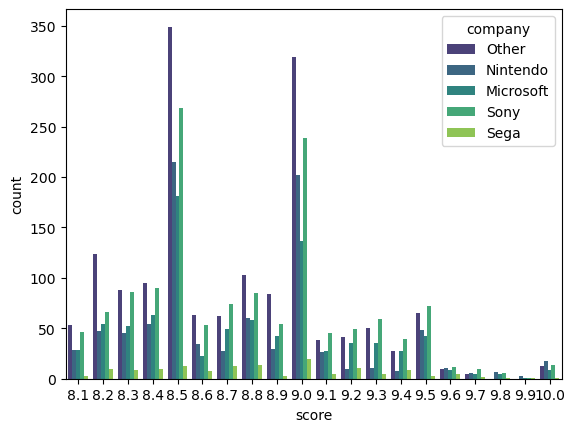

In [25]:
sns.countplot(x='score', data=df_games[df_games['score'] > 8], palette='viridis', hue='company')

In [40]:
top_genres = set()
for i in range(df_games[df_games['score'] == 10].shape[0]):
    top_genres.add((df_games[df_games['score']==10].iloc[i]['title'],df_games[df_games['score']==10].iloc[i]["genre"]))
    
newest_game = sorted(top_genres, key=lambda x: x[1], reverse=True)
newest_game

[('Mario Golf [Game Boy Color]', 'Sports, Action'),
 ('Checkered Flag', 'Racing'),
 ('Pokemon Red Version', 'RPG'),
 ('Pokemon Silver Version', 'RPG'),
 ('Pokemon Yellow: Special Pikachu Edition', 'RPG'),
 ('Pokemon Gold Version', 'RPG'),
 ('Undertale', 'RPG'),
 ('Dragon Warrior III', 'RPG'),
 ('Pokemon Blue Version', 'RPG'),
 ('Magical Tetris Challenge', 'Puzzle, Adventure'),
 ('Tornado Mania', 'Puzzle'),
 ('Shanghai', 'Puzzle'),
 ('The Witness', 'Puzzle'),
 ('Super Mario Galaxy 2', 'Platformer'),
 ('Super Mario Bros. Deluxe', 'Platformer'),
 ('Sonic The Hedgehog: Pocket Adventure', 'Platformer'),
 ('Infinity Blade II', 'Fighting, Action'),
 ('SNK vs. Capcom: Match of the Millennium', 'Fighting'),
 ('Soulcalibur', 'Fighting'),
 ('Inside', 'Adventure'),
 ('Chrono Trigger', 'Action, RPG'),
 ('Grand Theft Auto IV', 'Action, Adventure'),
 ('Grand Theft Auto V', 'Action, Adventure'),
 ('The Legend of Zelda: Skyward Sword', 'Action, Adventure'),
 ('The Legend of Zelda: Oracle of Seasons', '

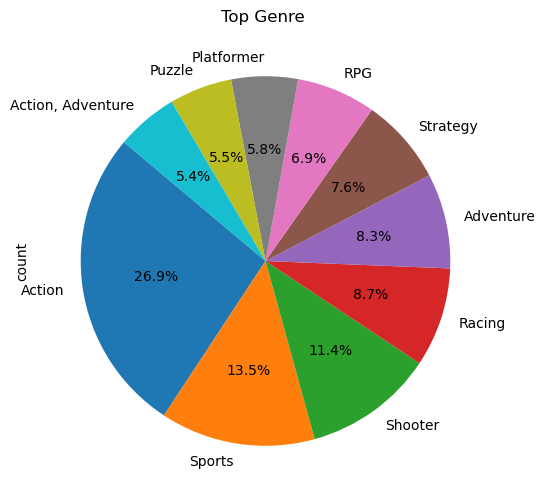

In [27]:
plt.figure(figsize=(10, 6))
df_games['genre'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top Genre ')
plt.show()

In [28]:
mean_score_nintendo = nintendo_games['score'].mean()

In [29]:
mean_score_sony = sony_games['score'].mean()

In [30]:
mean_score_microsoft = microsoft_games['score'].mean()

In [31]:
nintendo_games.describe()

,score,release_year,release_month,release_day
count,4858.000000,4858.000000,4858.000000,4858.000000
mean,6.547056,2006.210992,7.266159,15.367847
std,1.810735,4.011378,3.568122,8.569997
min,0.800000,1996.000000,1.000000,1.000000
25%,5.300000,2003.000000,4.000000,8.000000
50%,7.000000,2007.000000,8.000000,15.000000
75%,8.000000,2009.000000,11.000000,23.000000
max,10.000000,2016.000000,12.000000,31.000000


In [41]:
quality_games = df_games[df_games['score']>=6.5]
quality_games = quality_games.sort_values('score',ascending=False)
quality_games.head(10)

,title,score,score_phrase,platform,company,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Other,Racing,1999,7,6
28,Pokemon Gold Version,10.0,Masterpiece,Game Boy Color,Nintendo,RPG,2000,10,16
30,Pokemon Silver Version,10.0,Masterpiece,Game Boy Color,Nintendo,RPG,2000,10,16
31,Pokemon Yellow: Special Pikachu Edition,10.0,Masterpiece,Game Boy,Nintendo,RPG,1999,10,19
32,Red Dead Redemption -- Undead Nightmare,10.0,Masterpiece,Xbox 360,Microsoft,"Action, Adventure",2010,10,27
33,Red Dead Redemption -- Undead Nightmare,10.0,Masterpiece,PlayStation 3,Sony,"Action, Adventure",2010,10,27
34,SNK vs. Capcom: Match of the Millennium,10.0,Masterpiece,NeoGeo Pocket Color,Other,Fighting,2000,1,4
36,Sonic The Hedgehog: Pocket Adventure,10.0,Masterpiece,NeoGeo Pocket Color,Other,Platformer,1999,12,7
37,Soulcalibur,10.0,Masterpiece,Dreamcast,Sega,Fighting,1999,9,20
38,Super Mario Bros. Deluxe,10.0,Masterpiece,Game Boy Color,Nintendo,Platformer,1999,7,21


In [42]:
#content-based filter

tfidf = TfidfVectorizer(stop_words='english')
df_games['title']= df_games['title'].fillna("")
tfidf_matrix = tfidf.fit_transform(df_games["title"])

tfidf_matrix.shape

(18625, 7736)

In [43]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [44]:
indices = pd.Series(df_games.index,index=df_games['title']).drop_duplicates()

In [53]:
def get_recommendations_title(title,cosine_sim=cosine_sim):
    idx=indices[title]
    #on récupère tous les films ressemblant au titre inscrit
    sim_scores = list(enumerate(cosine_sim[idx]))
    #Trier les films basé sur le score de similarité
    sim_scores = sorted(sim_scores,key=lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    series_indices = [i[0] for i in sim_scores]
    r_title = df_games["title"].iloc[series_indices]
    r_platform = df_games['platform'].iloc[series_indices]
    r_score = df_games['score'].iloc[series_indices]
    frame = {'title': r_title,'platform': r_platform,'score':r_score}
    df_reco = pd.DataFrame(frame)
    
    return df_reco 

get_recommendations_title('Sonic The Hedgehog: Pocket Adventure')

,title,platform,score
1622,Sonic the Hedgehog 3,Wii,9.0
6210,Sonic the Hedgehog 2,Master System,8.0
6212,Sonic the Hedgehog 3,Xbox 360,8.0
6923,Sonic the Hedgehog 2,Xbox 360,7.9
16431,Sonic the Hedgehog,Xbox 360,4.8
16987,Sonic the Hedgehog,PlayStation 3,4.2
6213,Sonic the Hedgehog 4: Episode I,Xbox 360,8.0
6214,Sonic the Hedgehog 4: Episode I,Wii,8.0
6215,Sonic the Hedgehog 4: Episode I,PlayStation 3,8.0
8704,Sonic the Hedgehog 4: Episode I,iPhone,7.5
